# Data Analytics: Sales Data from 12 Months

### Import Dependencies

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
#Reading 1 csv file
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
18382,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"


### Merging All CSV Files into One File

In [3]:
files = [file for file in os.listdir('./Sales_Data')]
#using list comprehension to get all file names

main_data = pd.DataFrame()
#creating an empty dataframe

list = []

for i in range(12,24):
    list.append(files[i])
#there were some extra files so they were removed
    
for file in list:
    print(file)
    df = pd.read_csv("./Sales_Data/"+file)
    main_data = pd.concat([main_data, df])
#concatenated all the csv files from the different months

#main_data.to_csv('main_data', index = False)
#exported as a csv file

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### Confirming Data

In [4]:
df = pd.read_csv('main_data')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### 1) What was the best month for sales? How much was earned that month?

In [5]:
df = df.dropna(how = 'all')
#drop the rows with nan

In [6]:
#need the months in a seperate column

#data had some rows with the titles, most likely an error with the concatenation
df = df[df['Order Date'].str[0:2] != 'Or']

#then converted into string months
df['Month'] = df['Order Date'].str[0:2]


In [7]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()
#confirming there is no more NaN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [8]:
df['Month'] = df['Month'].astype('int32')
#then converting column month data into int 32

In [9]:
df.head()
#new data set

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
#now we need a sale colunm as well by multiplying the price and qty ordered
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')

df['Price Each'] = df['Price Each'].astype('float32')

#another option is by using pd.to_numeric()

In [11]:
df['Sale'] = df['Quantity Ordered']*df['Price Each']
#multiplying the two columns na dmaking the new column

df['Sale'] = df['Sale'].round(decimals = 2)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
#now that we have our two columns, we can simply group and find the month with the most sales

month_data = df.groupby('Month').sum()
month_data

,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1811768.375,1822256.73
2,13449,2188884.750,2202022.42
3,17005,2791207.750,2807100.38
4,20558,3367671.000,3390670.24
5,18667,3135125.000,3152606.75
6,15253,2562025.500,2577802.26
7,16072,2632539.500,2647775.76
8,13448,2230345.500,2244467.88
9,13109,2084992.125,2097560.13


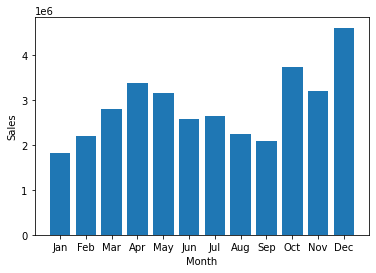

In [13]:
months = range(1,13)

look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

list = []
for i in months:
    list.append(look_up[i])
#using the dict to make another list of months

plt.bar(months, month_data['Sale'])
x = np.array(months)
plt.xticks(x, list)
#use this to make our own custom xticks
plt.ylabel('Sales')
plt.xlabel('Month')

plt.show()

### 2) What city had the highest number of Sales?

In [14]:
#to figure out the city with the most sales, then we need to get the cities in a column
list1 = []
list2 = []

for i in df['Purchase Address']:
    x = i.split(', ')[1]
    list1.append(x)

    x = i.split(', ')[2]
    x = x.split(' ')[0]
    list2.append(x)
# not the best method but after understanding the data type this should always work
# df['City'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1]) another faster method 
# same function and result
    
sum_list = [(a + ' (' + b + ')') for a,b in zip(list1, list2)]
#need to take both city and states as some cities are duplicated in the dataset

df['City'] = sum_list

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [15]:
city_data = df.groupby('City').sum()
city_data

,Quantity Ordered,Price Each,Month,Sale
City,,,,
Atlanta (GA),16602,2779908.250,104794,2795498.58
Austin (TX),11153,1809873.625,69829,1819581.75
Boston (MA),22528,3637409.750,141112,3661642.01
Dallas (TX),16730,2752627.750,104620,2767975.40
Los Angeles (CA),33289,5421435.000,208325,5452570.80
New York City (NY),27932,4635371.000,175741,4664317.43
Portland (ME),2750,447189.250,17144,449758.27
Portland (OR),11303,1860558.250,70621,1870732.34
San Francisco (CA),50239,8211461.500,315520,8262203.91


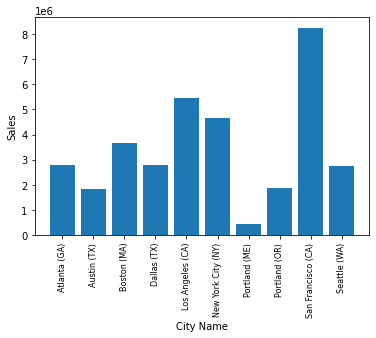

In [16]:
x = [city for city, i in city_data.groupby('City')]
#cities need to be in the same order as the y values as well
#using unique() does not match them up correctly
#city, i basically is the x,y coordinates so that it matches up

plt.bar(x, city_data['Sale'])
plt.xticks(x, rotation = 'vertical', size = 8 )
#performed simple tasks to make it more visually appealing
plt.ylabel('Sales')
plt.xlabel('City Name')
plt.show()

### 3) What time should we display advertisements to maximize the likelihood of customerès buying product?

In [17]:
df.head()
#main dataset 
#try to figure out what time to show advertisements to see what time people likely buy products

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
df['Hour'] = df['Order Date'].dt.hour
#using the date time library to convert the order date, we can get the hour or minutes very easily
df['Minute'] = df['Order Date'].dt.minute

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [21]:
hour = [hour for hour, i in df.groupby('Hour')]
print(df.groupby(['Hour']).count())
#grouping first by hours then counting the rows of that occurrence


      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587           

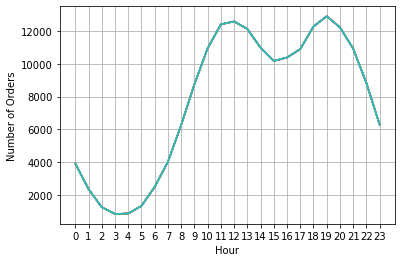

In [22]:
plt.plot(hour, df.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

#could set up another function to identify when to set up the ads
#maybe whenever the order are above a certain threshold, but from the graph, around 10 am and 6 pm as
# that is before the maximum peaks of the orders of a day

### 4) What products are most often sold together?

In [23]:
df.head()
#same order id means that they were sold together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [24]:
data = df[df['Order ID'].duplicated(keep = False)]
#keep = False keeps all occurrences of duplicates
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [25]:
data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#combining based on the order id the product names with join()
data.head()

C:\Users\dafzal\AppData\Local\Temp/ipykernel_5956/2802286552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [26]:
data = data[['Order ID', 'Grouped']].drop_duplicates()
data.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [27]:
#using https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5) What  products sold the most? Why do you think it sold the most?

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [29]:
#prod = df.pivot_table(columns=['Product'], aggfunc='size')
#will get the repetition of products
#prod = pd.DataFrame([prod])
#prod = prod.T
#gives the occurrences but easier solution underneath

In [30]:
prod = df.groupby('Product')
qty = prod.sum()['Quantity Ordered']

prod = [product for product, index in prod]
prod

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

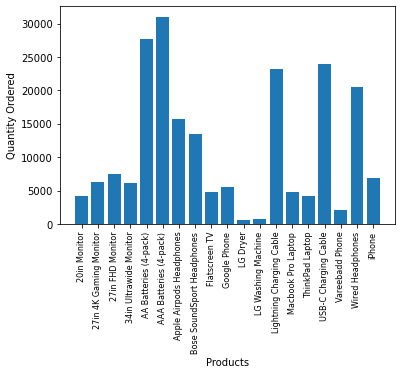

In [31]:
plt.bar(prod, qty)
plt.xticks(prod, rotation = 'vertical', size = 8 )
#performed simple tasks to make it more visually appealing
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [32]:
prices = df.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


C:\Users\dafzal\AppData\Local\Temp/ipykernel_5956/3421679859.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod, rotation='vertical', size=7)


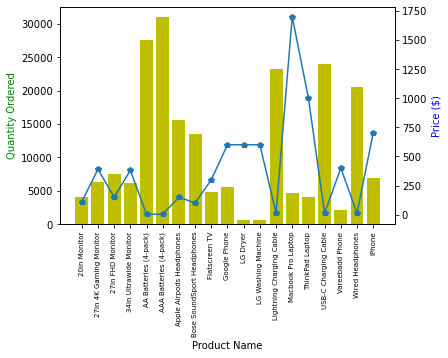

In [33]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod, qty, color = 'y')
ax2.plot(prod, prices, 'p-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(prod, rotation='vertical', size=7)

plt.show()
#shows that price and qty ordered definitely have some correlation (ex. AAA Battery) but this does
# not hold true for other products such as the Macbook Pro